<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Python pour 📊 Data Science
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Mini-Projet: Bitcoin Trading 🤖 Bot.
       </h2>
</center>

<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>ELGHABI Taha</li>
         <li>ELBATOURI Badr-eddine</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>Pr. H.Laanaya</li>
      </ul>
</div>

<div style="font-size:1.5em">

📜 Table des matières:

*   [Introduction 📖](#Intro-section)

    *   [Aperçu](#overview)
    *   [Jeu de données](#dataset)

    
*   [Collecte de données 📂](#data)

    *   [En utilisant Pandas](#pandas)
    *   [La Bibliothèque yfinance](#yfinance)
    *   [Les APIs](#api)

    
*   [Analyses et Transformations 🔎](#Analysis-section)

    *   [Exploration de données](#eda)
    *   [Transformation de données](#trans)
    *   [Visualisation de données](#vis)
    
    
*   [Approache avec les modèles de base du Machine Learning 🛠️](#ml-basic)

    *   [Préparation des données](#data-pre)
    *   [Construction des modèles](#model-building)
    *   [Evaluation des modèles](#model-eval)

    
*   [Approache avec le Deep Learning 🧠](#deep-learning)

    *   [Pré-traitement](#pre-processing)
    *   [LSTM](#LSTM)
    *   [Evaluation](#eval)
    

*   [Approache avec les séries chronologiques 📈](#ts)

    *   [Décomposition](#decomposition)
    *   [Prévision](#forcasting)
    *   [Validation](#validation)

    
*   [Trading 🤖 Bot](#Bot)
    
    *   [Création d'une simulation](#simulation)
    *   [Tester Les Approaches](#testing)
    *   [Trading in Binance](#binance)
    
    
*   [Conclusion 📌](#Conclusion)

</div>

<center id="Intro-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h2>
</center>

<div id="overview">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Aperçu
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Dans le cadre de nos études de la matière Python pour Data Science nous sommes amenez à réaliser Ce projet qui vise a <b>réaliser un bot de trading sous python</b>. Le but final est de réaliser un  <b>gain maximal</b> sur une période donnée (année 2021 par exemple).
</span>

<div id="dataset">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Jeu de données
        </h3>
</div>


<span style="color:grey; font-size:1.2em"><b>Données à utiliser: Bitcoin</b><br>
Ces données doivent être subdivisées en deux parties: une partie pour l'apprentissage du modèle utilisé dans le trading (par exemple un historique des données de l'année 2020). Une deuxième partie pour la validation (backtesting) du modèle (données 2021 par exemple).</span>


<center id="data">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Collecte de données 📂
        </h2>
</center>

<h4 style="color:grey"> Importation de bibliothèques </h4>

In [1]:
# importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
import requests, json

<div id="pandas">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  En utilisant Pandas
        </h3>
</div>

<span style="color:grey; font-size:1.2em">On va scaper les données du Bitcoin sur le site <b>https://www.investing.com</b></span>

In [2]:
url = 'https://www.investing.com/crypto/bitcoin/historical-data'

<span style="color:grey; font-size:1.2em">Afin de récupérer des données, nous devons spécifier une fausse valeur pour <b>headers<b/></span>

In [3]:

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}



<span style="color:grey; font-size:1.2em">La fonction `read_html()` transofrome des tableaux HTML dans une liste d'objets DataFrame</span>

In [4]:
r = requests.get(url, headers=header)

pd_data = pd.read_html(r.text)[0]

In [5]:
pd_data

Date    Price     Open     High      Low     Vol. Change %
0   Feb 01, 2022  38547.2  38475.6  38644.7  38189.4   55.89K    0.13%
1   Jan 31, 2022  38498.6  37923.8  38701.4  36672.8   61.27K    1.53%
2   Jan 30, 2022  37917.7  38167.5  38313.3  37390.6   34.10K   -0.66%
3   Jan 29, 2022  38170.8  37736.5  38663.7  37350.2   42.77K    1.13%
4   Jan 28, 2022  37745.1  37195.6  37995.9  36176.5   69.45K    1.56%
5   Jan 27, 2022  37164.3  36800.1  37215.4  35543.2   83.52K    0.99%
6   Jan 26, 2022  36800.4  36962.3  38862.6  36280.0  107.87K   -0.41%
7   Jan 25, 2022  36950.6  36691.3  37501.8  35729.3   79.68K    0.72%
8   Jan 24, 2022  36686.3  36268.6  37424.0  32985.6  153.77K    1.15%
9   Jan 23, 2022  36269.5  35072.9  36513.0  34655.2   70.43K    3.40%
10  Jan 22, 2022  35075.2  36467.7  36749.8  34116.0  138.09K   -3.84%
11  Jan 21, 2022  36475.5  40698.1  41104.6  35503.9  155.80K  -10.41%
12  Jan 20, 2022  40715.9  41683.6  43487.1  40568.3   65.28K   -2.31%
13  Jan 19, 2022  41677.8  42365.3  42558.0  41160.9   53.77K   -1.62%
14  Jan 18, 2022  42364.6  42209.9  42674.2  41300.7   47.32K    0.37%
15  Jan 17, 2022  42209.3  43080.5  43179.6  41559.4   41.44K   -2.02%
16  Jan 16, 2022  43079.1  43079.2  43462.0  42643.3   28.66K   -0.04%
17  Jan 15, 2022  43097.0  43073.6  43777.9  42586.1   31.44K    0.06%
18  Jan 14, 2022  43073.3  42562.2  43435.1  41848.7   50.50K    1.21%
19  Jan 13, 2022  42560.0  43900.0  44404.7  42337.5   53.42K   -3.05%
20  Jan 12, 2022  43901.0  42735.0  44243.6  42476.7   53.95K    2.73%
21  Jan 11, 2022  42733.2  41829.1  43090.2  41287.6   61.78K    2.15%
22  Jan 10, 2022  41832.2  41848.9  42243.8  39697.0   85.50K   -0.04%
23  Jan 09, 2022  41848.3  41681.2  42764.4  41260.9   37.51K    0.42%
24  Jan 08, 2022  41672.0  41551.3  42304.4  40574.3   52.54K    0.30%
25  Jan 07, 2022  41546.7  43097.9  43127.7  40810.0   88.36K   -3.60%
26  Jan 06, 2022  43097.5  43431.6  43772.3  42481.1   63.08K   -0.76%
27  Jan 05, 2022  43425.9  45833.1  47019.4  42535.1   83.74K   -5.26%
28  Jan 04, 2022  45837.3  46435.7  47505.4  45602.1   55.59K   -1.28%
29  Jan 03, 2022  46430.2  47293.9  47556.0  45704.0   41.06K   -1.86%
30  Jan 02, 2022  47311.8  47738.7  47944.9  46718.2   27.02K   -0.89%
31  Jan 01, 2022  47738.0  46217.5  47917.6  46217.5   31.24K    3.29%

<div id="yfinance">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  La Bibliothèque yfinance
        </h3>
</div>

<span style="color:grey; font-size:1.2em"><b>yfinance</b> est une bibliothèque open source populaire qui offre un accès aux données financières disponibles sur <b>Yahoo Finance</b>.</span>

In [6]:
data = yf.Ticker("BTC-USD")
yf_df = data.history(start='2014-09-01', end='2022-02-1')

In [7]:
yf_df

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   
2022-01-31  37920.281250  38647.261719  36733.574219  38483.125000   

                 Volume  Dividends  Stock Splits  
Date                                              
2014-09-17     21056800          0             0  
2014-09-18     34483200          0             0  
2014-09-19     37919700          0             0  
2014-09-20     36863600          0             0  
2014-09-21     26580100          0             0  
...                 ...        ...           ...  
2022-01-27  25041426629          0             0  
2022-01-28  22238830523          0             0  
2022-01-29  17194183075          0             0  
2022-01-30  14643548444          0             0  
2022-01-31  20734730465          0             0  

[2694 rows x 7 columns]

<div id="api">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Les APIs
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Utilisant par example l'api du <b>coincodex</b>.</span>

In [8]:
api_data = json.loads(requests.get('https://coincodex.com/api/coincodexcoins/get_historical_data_by_slug/bitcoin/2021-1-1/2021-9-30/1?t=5459791').text)
api_df = pd.DataFrame(api_data['data'])

In [9]:
api_df

time_start             time_end  price_open_usd  \
0    2021-01-01 00:00:00  2021-01-02 00:00:00    28938.896888   
1    2021-01-02 00:00:00  2021-01-03 00:00:00    29329.695772   
2    2021-01-03 00:00:00  2021-01-04 00:00:00    32148.048500   
3    2021-01-04 00:00:00  2021-01-05 00:00:00    32949.399464   
4    2021-01-05 00:00:00  2021-01-06 00:00:00    32023.293433   
..                   ...                  ...             ...   
268  2021-09-26 00:00:00  2021-09-27 00:00:00    42670.363351   
269  2021-09-27 00:00:00  2021-09-28 00:00:00    43204.962300   
270  2021-09-28 00:00:00  2021-09-29 00:00:00    42111.843283   
271  2021-09-29 00:00:00  2021-09-30 00:00:00    41004.598500   
272  2021-09-30 00:00:00  2021-10-01 00:00:00    41536.594100   

     price_close_usd  price_high_usd  price_low_usd  price_avg_usd  \
0       29300.190936    29560.027546   28718.621788   29212.849519   
1       32093.264962    33158.612438   29014.295884   30687.630605   
2       32877.607283    34717.662742   32057.582963   33449.168667   
3       31973.832154    33553.450548   29066.665438   31833.996330   
4       33965.160423    34359.990071   30087.201862   32215.458145   
..               ...             ...            ...            ...   
268     43209.865500    43740.017300   40775.924800   42754.820172   
269     42278.309962    44237.908838   42262.015900   43501.317757   
270     40909.310500    42732.015100   40909.310500   41929.529947   
271     41543.639900    42564.990200   40902.253800   41820.786800   
272     43797.592200    44032.294500   41466.712416   43256.711893   

       volume_usd  market_cap_usd  price_open_BTC  ...  price_avg_BTC  \
0    6.455859e+10    5.429904e+11               1  ...              1   
1    7.010424e+10    5.704312e+11               1  ...              1   
2    1.243495e+11    6.217950e+11               1  ...              1   
3    1.309183e+11    5.918035e+11               1  ...              1   
4    1.254265e+11    5.989281e+11               1  ...              1   
..            ...             ...             ...  ...            ...   
268  4.658194e+10    8.049300e+11               1  ...              1   
269  5.103144e+10    8.190240e+11               1  ...              1   
270  5.175010e+10    7.894712e+11               1  ...              1   
271  5.040584e+10    7.874622e+11               1  ...              1   
272  5.417509e+10    8.145377e+11               1  ...              1   

       volume_BTC  market_cap_BTC  price_open_ETH  price_close_ETH  \
0    2.209938e+06    1.858738e+07       38.941660        40.089550   
1    2.284446e+06    1.858831e+07       40.098820        41.582016   
2    3.717567e+06    1.858925e+07       41.684707        33.477441   
3    4.112530e+06    1.859030e+07       33.731919        30.720757   
4    3.893363e+06    1.859133e+07       30.701502        30.812829   
..            ...             ...             ...              ...   
268  1.089513e+06    1.882665e+07       14.543746        14.085923   
269  1.173101e+06    1.882757e+07       14.090957        14.337912   
270  1.234216e+06    1.882853e+07       14.377314        14.550476   
271  1.205282e+06    1.882945e+07       14.582053        14.551923   
272  1.252409e+06    1.883032e+07       14.548112        14.553423   

     price_high_ETH  price_low_ETH  price_avg_ETH    volume_ETH  \
0         39.188812      39.753389      39.496780  8.728544e+07   
1         42.170864      40.406332      40.934106  9.351177e+07   
2         34.429851      41.571930      38.970510  1.448755e+08   
3         29.120538      31.706033      31.433580  1.292715e+08   
4         30.491710      30.447517      30.478852  1.186652e+08   
..              ...            ...            ...           ...   
268       13.811362      14.807145      14.438247  1.573066e+07   
269       13.982875      14.332387      14.157527  1.660821e+07   
270       14.369856      14.578930      14.439326  1.782125e+07   
271 

<center id="Analysis-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h2>
</center>

<div id="eda">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Exploration de données
        </h3>
</div>

In [10]:
#  ignorer les avertissements
import warnings

warnings.filterwarnings("ignore")


<span style="color:grey; font-size:1.2em">Important nos jeu de données sous les fichier <b>amazon_cells_labelled.txt</b> content les , <b>imdb_labelled.txt</b> et <b>yelp_labelled.txt</b> content  <b>csv</b>.</span>

In [11]:
# Dataset d'amazon
BTC_data = pd.read_csv("BTC-USD.csv")

<h4 style="color:grey"> Explorant notre jeu de données </h4>

In [12]:
BTC_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
1  2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
2  2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
3  2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
4  2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   

     Volume  
0   8036550  
1   7860650  
2  33054400  
3  55629100  
4  43962800

In [13]:
BTC_data.tail()

Date          Open          High           Low         Close  \
2582  2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2583  2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2584  2022-01-28  37128.445313  37952.878906  36211.109375  37784.332031   
2585  2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2586  2022-01-30  38141.054688  38257.039063  37445.589844  37658.375000   

         Adj Close       Volume  
2582  36852.121094  31324598034  
2583  37138.234375  25041426629  
2584  37784.332031  22238830523  
2585  38138.179688  17194183075  
2586  37658.375000  15078688768

<span style="color:grey; font-size:1.2em">Un aperçu des données en utilisant les fonctions <b>info()</b> et <b>describe()</b> du pandas pour examiner les données. </span>

In [14]:
# Types de données
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2587 non-null   object 
 1   Open       2587 non-null   float64
 2   High       2587 non-null   float64
 3   Low        2587 non-null   float64
 4   Close      2587 non-null   float64
 5   Adj Close  2587 non-null   float64
 6   Volume     2587 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.6+ KB


In [15]:
# description des données numériques
BTC_data.describe()

Open          High           Low         Close     Adj Close  \
count   2587.000000   2587.000000   2587.000000   2587.000000   2587.000000   
mean   11526.557998  11837.441885  11181.636432  11539.137727  11539.137727   
std    16125.451732  16560.213737  15620.581779  16127.693179  16127.693179   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      668.401001    682.131500    659.186981    671.705506    671.705506   
50%     6472.359863   6571.459961   6371.339844   6476.290039   6476.290039   
75%    10588.433594  10853.628907  10291.997071  10596.799317  10596.799317   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.587000e+03  
mean   1.524369e+10  
std    2.025705e+10  
min    7.860650e+06  
25%    9.976850e+07  
50%    5.482196e+09  
75%    2.553415e+10  
max    3.509679e+11

In [16]:
# Cellules vides
print(f"Le nombre de cellule vides dans notre dataset est :\n{BTC_data.isna().sum()}")

Le nombre de cellule vides dans notre dataset est :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<div id="trans">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Transformation de données
        </h3>
</div>


<span style="color:grey; font-size:1.2em">Nous définissons la colonne <b>Date</b> comme index de notre Dataframe.</span>  

In [17]:
BTC_Data = BTC_data.set_index('Date', drop=True)

<span style="color:grey; font-size:1.2em">Nous ne conservons que les données après le <b>01/01/2020</b> comme demandé.</span>  


In [18]:
BTC_Data = BTC_Data[BTC_Data.index>='2020-01-01']

<span style="color:grey; font-size:1.2em">Explorant donc le nouveau Dataframe.</span>  


In [19]:
BTC_Data.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   

                 Volume  
Date                     
2020-01-01  18565664997  
2020-01-02  20802083465  
2020-01-03  28111481032  
2020-01-04  18444271275  
2020-01-05  19725074095

In [20]:
BTC_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 2020-01-01 to 2022-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       761 non-null    float64
 1   High       761 non-null    float64
 2   Low        761 non-null    float64
 3   Close      761 non-null    float64
 4   Adj Close  761 non-null    float64
 5   Volume     761 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.6+ KB


In [21]:
BTC_Data.describe()

Open          High           Low         Close     Adj Close  \
count    761.000000    761.000000    761.000000    761.000000    761.000000   
mean   29688.614278  30486.994229  28796.105450  29722.574654  29722.574654   
std    19460.961155  19976.294647  18839.573029  19439.046678  19439.046678   
min     5002.578125   5331.833984   4106.980957   4970.788086   4970.788086   
25%     9793.070313   9938.297852   9632.382813   9795.943359   9795.943359   
50%    32129.408203  33159.640625  30681.496094  32127.267578  32127.267578   
75%    47491.203125  48745.734375  46424.496094  47345.218750  47345.218750   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  7.610000e+02  
mean   3.968731e+10  
std    2.042345e+10  
min    1.225260e+10  
25%    2.705580e+10  
50%    3.583803e+10  
75%    4.693700e+10  
max    3.509679e+11

<div id="vis">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Visualisation de données
        </h3>
</div>

In [22]:
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

<span style="color:grey; font-size:1.2em">Traçons <b>le prix</b> du Bitcoin</span>  


In [23]:
# visualiser la valeur "Close"
btc_trace = go.Figure(data=[go.Scatter(x=BTC_Data.index, y=BTC_Data['Close'], name= 'Close')])

btc_trace.update_layout(
title = {
    'text': 'btc_trace for Close Value',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

btc_trace.show()

<span style="color:grey; font-size:1.2em">Traçons la valeur du <b>"Volume"</b> du Bitcoin</span>  


In [24]:
# visualiser la valeur "Volume"

btc_trace = go.Figure(data=[go.Scatter(x=BTC_Data.index, y=BTC_Data['Volume'], name= 'Volume')])

btc_trace.update_layout(
title = {
    'text': 'btc_trace for Volume Value',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

btc_trace.show()


<span style="color:grey; font-size:1.2em">Traçons <b>la matrice de corrélation</b> pour sélectionner les colonnes appropriées.</span>

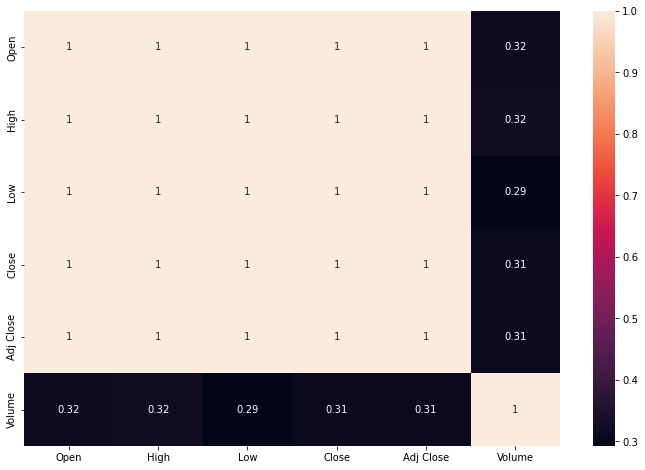

In [25]:
# the correlation matrix 
mat = BTC_Data.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(mat,annot=True)

plt.show()

<h4 style="color:grey"> CANDELSTICK CHARTS</h4>

In [26]:
def candelstick_chart(data,title):
    candlestick = go.Figure(data = [go.Candlestick(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')],
                                               #increasing_line_color= 'cyan', 
                                               #decreasing_line_color= 'gray'
                                                )])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    candlestick.update_layout(
    title = {
        'text': '{:} Candelstick Chart'.format(title),
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'} , 
    template="plotly_white")

    candlestick.update_yaxes(title_text = 'Prix en USD', ticksuffix = '$')
    return candlestick

In [27]:
btc_plot = candelstick_chart(BTC_Data[-90:],title = "Bitcoin(BTC)")
btc_plot.show()

<h4 style="color:grey">OHLC CHARTS</h4>

In [28]:
def ohlc_chart(data,title):
    ohlc = go.Figure(data = [go.Ohlc(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    ohlc.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    ohlc.update_layout(
    title = {
        'text': '{:} OHLC Chart'.format(title),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

    ohlc.update_yaxes(title_text = 'Prix en USD', ticksuffix = '$')
    return ohlc

In [29]:
ohlc_chart(BTC_Data[:-200], title = "Bitcoin")

In [30]:
def vol_traded(data ,title,color):
    area = px.area(data_frame=data,
               x = data.index ,
               y = "Volume",
               markers = True)
    area.update_traces(line_color=color)
    area.update_xaxes(
        title_text = 'Time',
        rangeslider_visible = True)
    area.update_yaxes(title_text = 'Number of trades every minute')
    area.update_layout(showlegend = True, xaxis_rangeslider_visible=False,
        title = {
            'text': '{:} Volume Traded'.format(title),
            'y':0.94,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        template="plotly_white")
    return area

In [31]:
vol_traded(BTC_Data[-90:], "Bitcoin",color = "blue")

<center id="ml-basic">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approache avec les modèles de base du Machine Learning 🛠️
        </h2>
</center>

<div id="data-prep">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Pré-traitement
        </h3>
</div>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<h4 style="color:grey">Diviser les données</h4>

<span style="color:grey; font-size:1.2em">Dataframe du prix de close du Bitcoin.</span>

In [33]:
closedf = BTC_data[['Date','Close']]
print("Forme du dataframe close", closedf.shape)

Forme du dataframe close (2587, 2)


In [34]:
closedf = closedf[closedf['Date'] > '2020-09-13']
close_stock = closedf.copy()
print("Données totales pour la prédiction : ",closedf.shape[0])

Données totales pour la prédiction :  504


<span style="color:grey; font-size:1.2em">Normalizing close price value.</span>

In [35]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(504, 1)



<span style="color:grey; font-size:1.2em">Maintenant on va diviser notre jeu de données <b>70%</b> pour l'entraînement et <b>30%</b> pour le test.</span>

In [36]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]

In [37]:
print("la taille des données d'entraînement est: ",train_data.shape[0])
print("la taille d'échantillon du test est: ",test_data.shape[0])

la taille des données d'entraînement est:  352
la taille d'échantillon du test est:  152


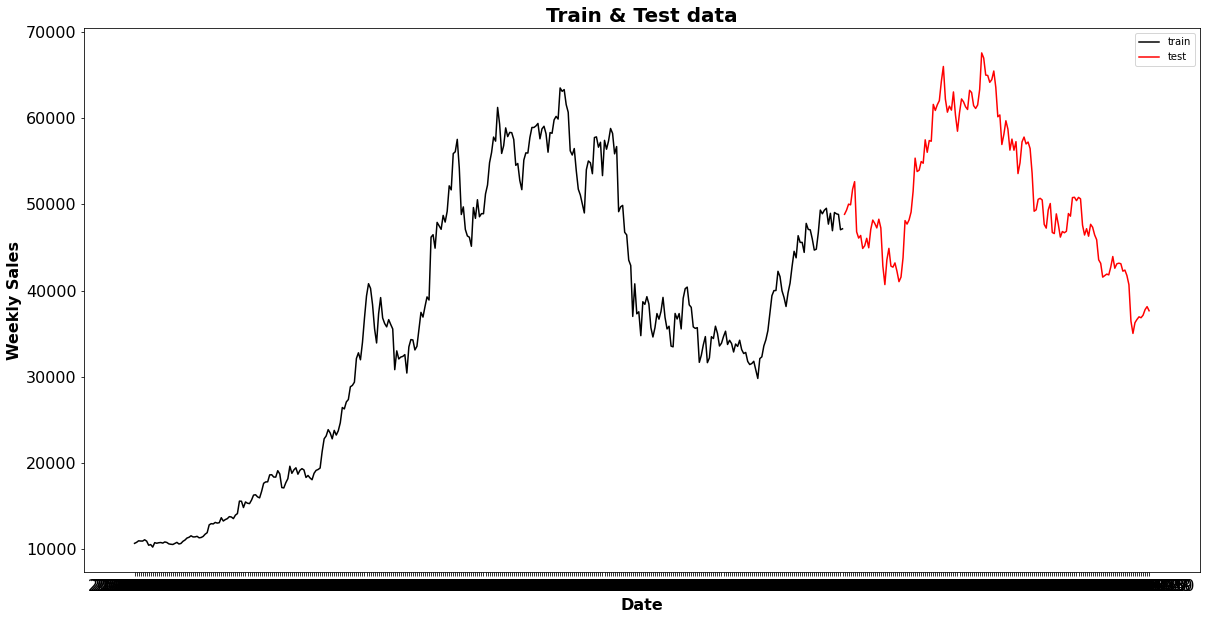

In [38]:

fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(x = close_stock['Date'][:train_data.shape[0]], y = close_stock['Close'][:train_data.shape[0]], color = 'black')
sb.lineplot(x = close_stock['Date'][train_data.shape[0]:], y = close_stock['Close'][train_data.shape[0]:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))


<span style="color:grey; font-size:1.2em">Convertir un tableau de valeurs en une matrice de jeu de données.</span>

In [39]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (336, 15)
y_train:  (336,)
X_test:  (136, 15)
y_test (136,)


<div id="pre-processing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Construction des modèles
        </h3>
</div>

In [41]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 


<span style="color:grey; font-size:1.2em">Nous allons choisir un ensemble de modèles pour commencer</span>  


In [42]:
LR=LinearRegression()

XGBoost = XGBRegressor(n_estimators=100, learning_rate=0.3,
                     max_delta_step=0, max_depth=6, n_jobs=4,
                     num_parallel_tree=1, random_state=0)

RFR = RandomForestRegressor(max_depth=1000)
models = {"Linear Regression":LR, "XGBoost Regressor":XGBoost, "Random Forest Regressor":RFR}

In [43]:
def train_model(model_name):
    models[model_name].fit(X_train,y_train)
    predictions = models[model_name].predict(X_test)
    print("\n---------------"+model+"---------------\n")
    print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
    print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions)))+"\n")
    

In [44]:
for model in models:
    train_model(model)


---------------Linear Regression---------------

Mean Absolute Error - MAE : 0.02468877316851655
Root Mean squared Error - RMSE : 0.03204950005533035


---------------XGBoost Regressor---------------

Mean Absolute Error - MAE : 0.047398661971883777
Root Mean squared Error - RMSE : 0.06095256391999026


---------------Random Forest Regressor---------------

Mean Absolute Error - MAE : 0.03180003006797318
Root Mean squared Error - RMSE : 0.03955410481014257



In [45]:
def predict(model_name):
    train_predict=models[model_name].predict(X_train)
    test_predict=models[model_name].predict(X_test)

    # Transform back to original form
    train_predict = train_predict.reshape(-1,1)
    test_predict = test_predict.reshape(-1,1)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    
    return train_predict, test_predict

<div id="model-building">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Evaluation des modèles
        </h3>
</div>

<span style="color:grey; font-size:1.2em">On va <b>évaluer</b> nos modèles à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [46]:
from itertools import cycle

In [47]:
def eval(model):
    train_predict, test_predict = predict(model)
    # shift train predictions for plotting
    look_back=time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
    
    original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
    original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
    

    
    names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

    plotdf = pd.DataFrame({'date': close_stock['Date'],
                           'original_close': close_stock['Close'],
                          'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                          'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                              plotdf['test_predicted_close']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction avec le '+model,
                      plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    
    ## Variance Regression Score
    print("\n\nTrain data explained variance regression score:", 
          explained_variance_score(original_ytrain, train_predict))
    print("Test data explained variance regression score:", 
          explained_variance_score(original_ytest, test_predict))

    ## R square score for regression
    print("\nTrain data R2 score:", r2_score(original_ytrain, train_predict))
    print("Test data R2 score:", r2_score(original_ytest, test_predict))
    


In [48]:
for model in models:
    eval(model) 
    



Train data explained variance regression score: 0.9884835588523104
Test data explained variance regression score: 0.9522424065346115

Train data R2 score: 0.9884835588523104
Test data R2 score: 0.9522347837752287




Train data explained variance regression score: 0.999984465063647
Test data explained variance regression score: 0.8689084300577633

Train data R2 score: 0.9999844650636438
Test data R2 score: 0.8272360322955754




Train data explained variance regression score: 0.9978429674006022
Test data explained variance regression score: 0.9328979194967657

Train data R2 score: 0.9978429608778566
Test data R2 score: 0.9272467582458959


<span style="color:grey; font-size:1.2em">Comme on peut le voir, les approches ml de base obtiennent des résultats respectables, mais nous n'avons obtenu un modèle qui fonctionne très bien sur toutes les données</span>

<center id="deep-learning">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approache avec le Deep Learning 🧠
        </h2>
</center>

<div id="pre-processing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Pré-traitement
        </h3>
</div>

<span style="color:grey; font-size:1.2em">"Reshape" l'entrée pour qu'elle soit <b>[samples, time steps, features]</b> , ce qui est requis pour LSTM.</span>  


In [49]:
# reshape input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (336, 15, 1)
X_test:  (136, 15, 1)


<div id="LSTM">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  LSTM
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Après avoir appliqué le modèle de régression linéaire à nos données, nous allons essayer d'implémenter un modèle de deep learning : LSTM qui est très adapté à ce cas.</span>

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

<span style="color:grey; font-size:1.2em">Maintenant nous créons un nouveau modèle `Sequential()` puis nous ajoutons<b> 2 couches:</b> <br> une couche avec l'activation <b>relu</b> avec 10 unités et la deuxieme avec une unité.</span>

In [51]:
LSTM_model=Sequential()

LSTM_model.add(LSTM(10,input_shape=(None,1),activation="relu"))

LSTM_model.add(Dense(1))

<span style="color:grey; font-size:1.2em">On choisit les paramètres de la méthode `.compile()`. <br>pour le paramètre <b>loss</b> est <i>mean_squared_error</i> afin de calculer la perte d'entropie croisée entre les deux "Labels" et les prédictions. pour <b>optimizer</b> on choisit: <i>adam</i> et bien sûr <i>accuracy</i> comme <b>metrics</b> </span>

In [52]:
LSTM_model.compile(loss="mean_squared_error",optimizer="adam")

<span style="color:grey; font-size:1.2em">Voyons un <b>summary<b> des paramètres de notre modèle</span>

In [53]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = LSTM_model.fit( X_train, y_train,
                         validation_data=(X_test,y_test),
                         epochs=100, batch_size=32,
                         verbose=True)

Epoch 1/100
11/11 [==============================] - 3s 49ms/step - loss: 0.6021 - val_loss: 1.0579
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 0.4890 - val_loss: 0.8854
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 0.4105 - val_loss: 0.7609
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 0.3513 - val_loss: 0.6680
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 0.3041 - val_loss: 0.5784
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.2564 - val_loss: 0.4881
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.2130 - val_loss: 0.4057
Epoch 8/100
11/11 [==============================] - 0s 12ms/step - loss: 0.1756 - val_loss: 0.3330
Epoch 9/100
11/11 [==============================] - 0s 11ms/step - loss: 0.1425 - val_loss: 0.2713
Epoch 10/100
11/11 [==============================] - ETA: 0s - loss: 0.118 - 0s 11ms/step - loss: 0

11/11 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 82/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 83/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 84/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 85/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 86/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 87/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 88/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 89/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 90/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0014
Epo

In [55]:
predictions = LSTM_model.predict(X_test)
print("\n---------------LSTM---------------\n")
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions)))+"\n")


---------------LSTM---------------

Mean Absolute Error - MAE : 0.028634335177410968
Root Mean squared Error - RMSE : 0.037771224270360094



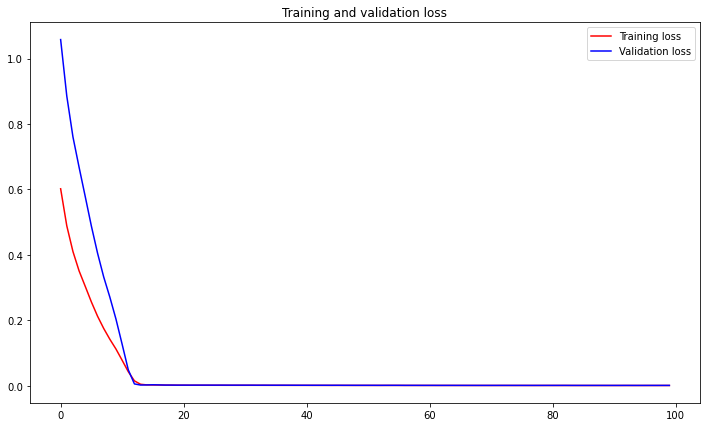

In [56]:
# Plotting Loss vs Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12, 7))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

<span style="color:grey; font-size:1.2em">Faisons la prédiction pour vérifer les mesures de performance.</span>

In [57]:
train_predict=LSTM_model.predict(X_train)
test_predict=LSTM_model.predict(X_test)
train_predict.shape, test_predict.shape

# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<div id="eval">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Evaluation
        </h3>
</div>

<span style="color:grey; font-size:1.2em">C'est temps d' <b>évaluer</b> notre modèle à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [58]:
## Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9836163273215048
Test data explained variance regression score: 0.9357986143325998


In [59]:
## R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9828841807776426
Test data R2 score: 0.9336575846532421


In [60]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Prediction avec LSTM',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<span style="color:grey; font-size:1.2em">Comme nous pouvons le voir, nous avons atteint un meilleur score avec un réseau de neurones artificiels pour nos données du test qui provient de différentes sources</span>

<center id="model-eval">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approache avec les séries chronologiques 📈
        </h2>
</center>

<div id="decomposition">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Décomposition
        </h3>
</div>

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning

warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [62]:
tickerSymbol = 'BTC-USD'
data = yf.Ticker(tickerSymbol)

In [63]:
prices = data.history(start='2020-01-01', end='2022-01-31').Close
returns = prices.pct_change().dropna()

In [64]:
returns

Date
2020-01-01    0.000914
2020-01-02   -0.029819
2020-01-03    0.051452
2020-01-04    0.008955
2020-01-05    0.000089
                ...   
2022-01-26   -0.002757
2022-01-27    0.007764
2022-01-28    0.017397
2022-01-29    0.009365
2022-01-30   -0.005784
Name: Close, Length: 761, dtype: float64

#### Visualisation

<span style="color:grey; font-size:1.2em">À quoi ressemble ma série chronologique ?</span>

In [65]:
fig = px.line(prices)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Price',
                   plot_bgcolor='white')

fig.show()

In [66]:

fig = px.line(returns)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Returns',
                   plot_bgcolor='white')

fig.show()

#### Transformation

<span style="color:grey; font-size:1.2em">Lorsque une série chronologique a une croissance exponentielle, il est généralement judicieux d'utiliser le logarithme pour rendre l'intrigue plus linéaire.</span>

In [67]:
log_df = np.log(prices) #log df

fig = px.line(log_df, x=log_df.index, y="Close")

fig.update_layout(title='BTC/USD Log Price Representation',
                   xaxis_title='Years',
                   yaxis_title='LOG Price',
                   plot_bgcolor='white')

fig.show()

#### Stationarisation

<span style="color:grey; font-size:1.2em">Les modèles des séries chronologiques fonctionnent mieux avec série stationnaire !
<b>Essayons de différencier la version linéarisée de la série chronologique.</b>
<br>
&emsp;&emsp;👉 Une série temporelle stationnaire est une série dont les propriétés ne dépendent pas du moment auquel la série est observée.</span>

Text(0.5, 1.0, 'Différenciation de 2ème ordre')

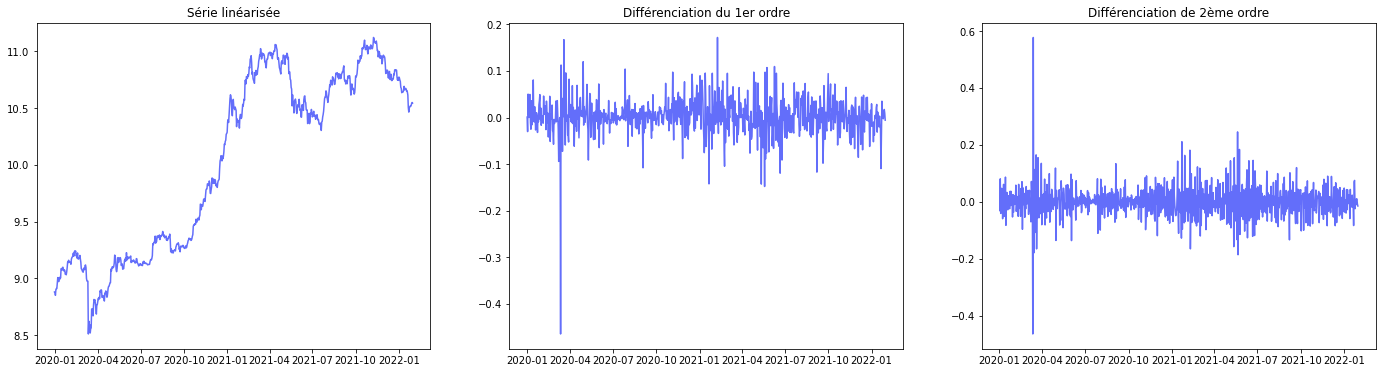

In [68]:
# Faisons la différence et regardons les ACF
fig, axes = plt.subplots(1, 3,figsize=(24,6))

plt.style.use('seaborn-deep')

axes[0].plot(log_df, color="#636EFA");
axes[0].set_title('Série linéarisée')
             
# 1ère différenciation
y_diff = log_df.diff().dropna()
axes[1].plot(y_diff, color="#636EFA");
axes[1].set_title('Différenciation du 1er ordre')

# 2e différenciation
y_diff_diff = log_df.diff().diff().dropna()
axes[2].plot(y_diff_diff, color="#636EFA");
axes[2].set_title('Différenciation de 2ème ordre')

<span style="color:grey; font-size:1.2em">👉 Vérifiez la stationnarité à l'aide du test Augmented Dickey-Fuller :
<br>
     &emsp;&emsp;❌ Hypothèse nulle : La stationnarité <b>n'existe pas</b> dans la série.
<br>
      &emsp;&emsp; ❗  Hypothèse alternative : la stationnarité <b>existe</b> dans la série.
</span>

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
adfuller(log_df)

(-1.2695886141941661,
 0.6429682090291627,
 4,
 757,
 {'1%': -3.4390179167598367,
  '5%': -2.8653655786032237,
  '10%': -2.5688071343462777},
 -2639.8613420347274)

In [71]:
# check with ADF Test for stationarity

y_diff= log_df.diff().dropna()
y_diff_diff= log_df.diff().diff().dropna()

print('p-value zero-diff: ', adfuller(log_df)[1])
print('p-value first-diff: ', adfuller(y_diff)[1])
print('p-value second-diff: ', adfuller(y_diff_diff)[1])

p-value zero-diff:  0.6429682090291627
p-value first-diff:  1.584008803681773e-23
p-value second-diff:  1.240098150781382e-18


**Remarque:**
- Une p-value (<0,05) suggère une preuve solide contre H0, donc vous **rejetez l'hypothèse nulle**. 👉 Stationnaire
- Une p-value (> 0,05) indique une preuve faible contre H0, donc vous **ne parvenez pas à rejeter l'hypothèse nulle**. 👉 Non stationnaire

<div id="forcasting">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Prévision
        </h3>
</div>

#### ARIMA

<span style="color:grey; font-size:1.2em">Trouvons les hyperparamètres p et q</span>

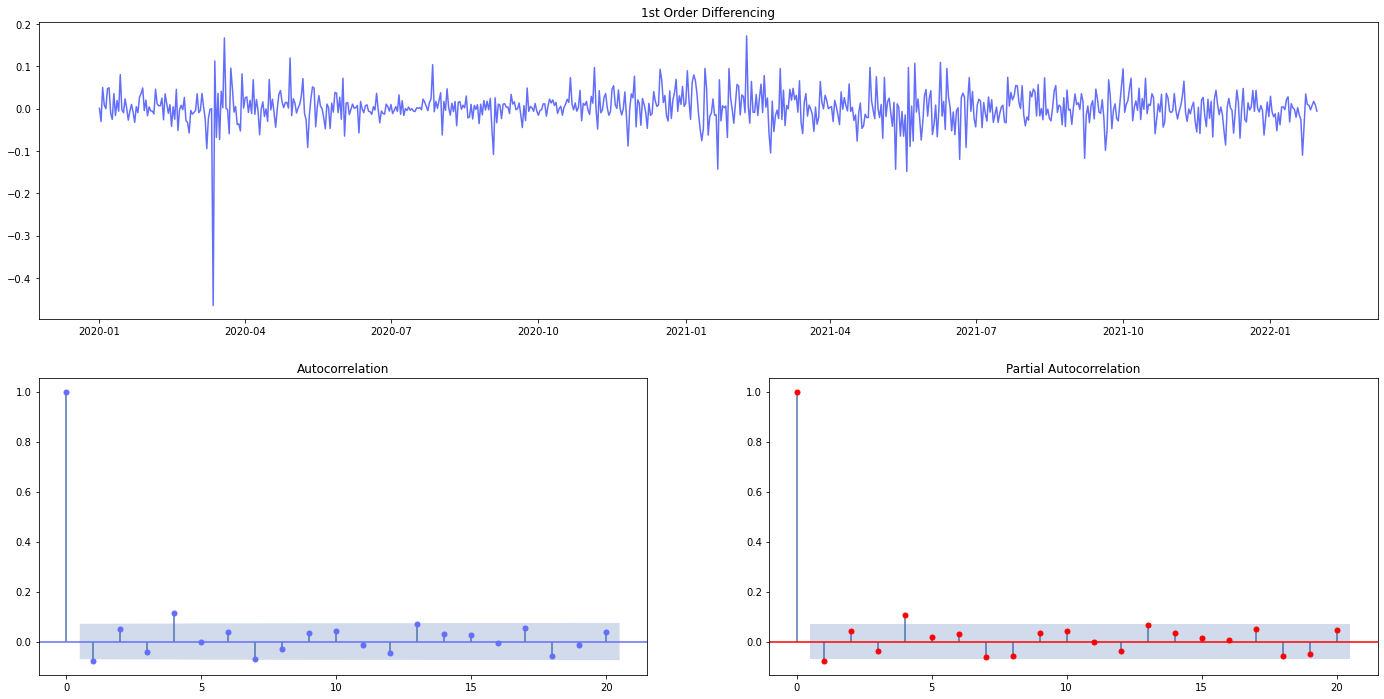

In [72]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#figure setup
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('1st Order Differencing')
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#plots
ax1.plot(y_diff, color="#636EFA")
plot_acf(y_diff, lags=20, ax=ax2, color="#636EFA");
plot_pacf(y_diff, lags=20, ax=ax3, color='r', method='ywm')
plt.show()

<span style="color:grey; font-size:1.2em">Nous utilisons le diagramme <b>PACF</b> pour calculer la valeur de <b>p</b><br>Nous utilisons le graphique <b>ACF</b> pour calculer la valeur de <b>q</b>
</span>

#### Training the ARIMA

In [73]:
log_df

Date
2019-12-31     8.880947
2020-01-01     8.881861
2020-01-02     8.851588
2020-01-03     8.901759
2020-01-04     8.910674
                ...    
2022-01-26    10.514668
2022-01-27    10.522402
2022-01-28    10.539650
2022-01-29    10.548971
2022-01-30    10.543171
Name: Close, Length: 762, dtype: float64

In [74]:
#from statsmodels.tsa.arima_model import ARIMA #statsmodels 0.11
from statsmodels.tsa.arima.model import ARIMA #statsmodels >=0.12

y= log_df #just to be precise

arima = ARIMA(y, order=(1,1,1))
#arima = arima.fit(disp = 0 )
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  762
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1361.890
Date:                Tue, 01 Feb 2022   AIC                          -2717.780
Time:                        09:17:30   BIC                          -2703.876
Sample:                    12-31-2019   HQIC                         -2712.426
                         - 01-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7966      0.105     -7.619      0.000      -1.001      -0.592
ma.L1          0.7254      0.121      5.980      0.000       0.488       0.963
sigma2         0.0016   2.39e-05     68.326      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18604.42
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -2.01
Prob(H) (two-sided):                  0.01   Kurtosis:                        26.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
!pip install pmdarima
import pmdarima as pm
smodel = pm.auto_arima(y,
                       start_p =0, max_p = 5,
                       start_d = 0, max_d = 5,
                       start_q = 0, max_q = 5,
                       seasonal = False,
                       trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2711.465, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2714.253, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2713.860, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2711.270, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2713.726, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2718.192, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2716.214, Time=0.94 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2716.216, Time=1.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2713.155, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2714.683, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2717.780, Time=0.40 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.503 seconds


#### Diviser notre série

In [76]:
train_size=0.7 #70% of data

index = round(train_size*log_df.shape[0])

y_train = log_df.iloc[:index] #first 70% rows for training set
y_test = log_df.iloc[index:] #last 30% rows for test set
n_train=len(y_train)

#results from autoarima
best_order = smodel.order # best (p,d,q)

In [77]:
print("la taille des données d'entraînement est: ",y_train.shape[0])
print("la taille d'échantillon du test est: ",y_test.shape[0])

la taille des données d'entraînement est:  533
la taille d'échantillon du test est:  229


In [78]:
y_train

Date
2019-12-31     8.880947
2020-01-01     8.881861
2020-01-02     8.851588
2020-01-03     8.901759
2020-01-04     8.910674
                ...    
2021-06-11    10.527670
2021-06-12    10.478766
2021-06-13    10.573823
2021-06-14    10.602082
2021-06-15    10.606740
Name: Close, Length: 533, dtype: float64

<span style="color:grey; font-size:1.2em">Commençons le "training" notre modèle</span>

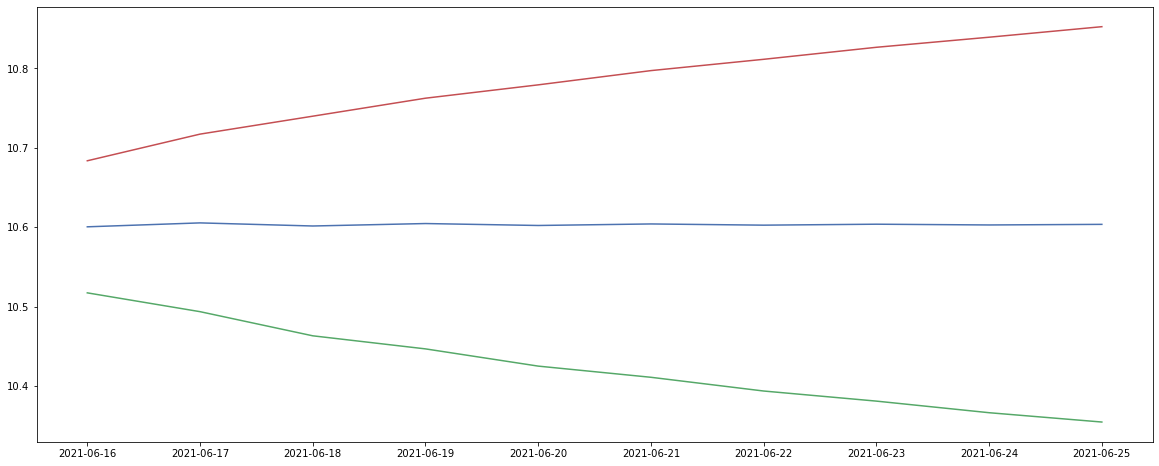

In [79]:
plt.figure(figsize=(20,8))
plt.plot(ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean)
plt.plot(ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int())

In [80]:
arima_df = ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int()
arima_df['pred'] = ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean
arima_df

lower Close  upper Close       pred
2021-06-16    10.517316    10.683672  10.600494
2021-06-17    10.493619    10.717249  10.605434
2021-06-18    10.463214    10.739840  10.601527
2021-06-19    10.446740    10.762495  10.604618
2021-06-20    10.425045    10.779301  10.602173
2021-06-21    10.410967    10.797246  10.604107
2021-06-22    10.393672    10.811482  10.602577
2021-06-23    10.380954    10.826620  10.603787
2021-06-24    10.366347    10.839313  10.602830
2021-06-25    10.354607    10.852566  10.603587

In [81]:
def walk_forward_validation(n_train, test):
    # create dataframe to store the outcome
    result = pd.DataFrame(columns=['forecast', 'lower_interval', 'upper_interval'])
    # predict one point at a time
    for i in range(len(test)):
        # define train set
        train_ = log_df.iloc[:n_train+i].copy()
        # train the model
        arima = ARIMA(endog = train_, order=best_order).fit(method_kwargs={"warn_convergence": False})
        # get the forecast
        results = arima.get_forecast(1, alpha=0.05)
        # central
        result.loc[i, 'forecast'] = results.predicted_mean[0]
        # lower interval
        result.loc[i, 'lower_interval'] = results.conf_int().iloc[0, 0]
        # upper interval
        result.loc[i, 'upper_interval'] = results.conf_int().iloc[0, 1]
    # join with test dataframe
    result.index=test.index
    result = result.apply(pd.to_numeric)
    test = test.to_frame()
    print(type(test))
    return test.join(result)

result = walk_forward_validation(n_train, y_test)

<class 'pandas.core.frame.DataFrame'>


In [82]:
result

Close   forecast  lower_interval  upper_interval
Date                                                            
2021-06-16  10.554433  10.600494       10.517316       10.683672
2021-06-17  10.546748  10.564216       10.481024       10.647408
2021-06-18  10.485347  10.540783       10.457656       10.623910
2021-06-19  10.480547  10.495875       10.412691       10.579059
2021-06-20  10.482858  10.473713       10.390600       10.556826
...               ...        ...             ...             ...
2022-01-26  10.514668  10.517152       10.437705       10.596599
2022-01-27  10.522402  10.515067       10.435672       10.594462
2022-01-28  10.539650  10.521561       10.442218       10.600905
2022-01-29  10.548971  10.539030       10.459721       10.618339
2022-01-30  10.543171  10.548757       10.469505       10.628010

[229 rows x 4 columns]

<div id="validation">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Validation
        </h3>
</div>

In [83]:
# baseline = tomorrows prediction is todays price
result['base'] = result['Close'].shift()
result['base'].iloc[0] = y_train.to_frame().Close[-1]
result.apply(lambda x: np.exp(x).astype('float16')).tail(5) #exp for visualization only

Close  forecast  lower_interval  upper_interval     base
Date                                                                  
2022-01-26  36864.0   36928.0         34112.0         40000.0  36960.0
2022-01-27  37152.0   36864.0         34048.0         39904.0  36864.0
2022-01-28  37792.0   37120.0         34272.0         40160.0  37152.0
2022-01-29  38144.0   37760.0         34880.0         40864.0  37792.0
2022-01-30  37920.0   38144.0         35232.0         41280.0  38144.0

In [84]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    # shift train predictions for plotting
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    names = cycle(['Training data','Actual close price','Forecast close price'])


    plotdf = pd.DataFrame({'date': log_df.index,
                           'training': train,
                           'actual': test,
                           'Forecast': fc_series})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['training'],plotdf['actual'],
                                              plotdf['Forecast']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction avec ARIMA (1, 1, 1)',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [85]:
plot_forecast(result.forecast, y_train, y_test, np.array(result.upper_interval), np.array(result.lower_interval))

<span style="color:grey; font-size:1.2em">Évaluons à l'aide de mesures de performances.</span>

In [86]:
# define a function to get MAPE using y_pred, y_true
def get_mape(y_true, y_pred):
    '''takes y_true, y_pred (pandas series)
    returns mean absolute percentage error'''
    mape = 100*((y_true - y_pred)/y_true).abs().mean()
    return round(mape, 2)

# define a function to get MASE using y_pred, y_true
def get_mase(y_true, y_pred, y_train):
    '''takes y_true, y_pred (pandas series)
    returns mean absolute scaled error'''
    mae_test = (y_true - y_pred).abs().mean()
    y_t = y_train
    y_t_1 = y_train.shift(-1)
    mae_train = (y_t - y_t_1).abs().mean()
    return round(mae_test/mae_train, 2)

In [87]:
# MAPE and MASE 
print('mape model:', get_mape(result.Close, result.forecast))
print('mape baseline:', get_mape(result.Close, result.base))
print('')
print('mase model:', get_mase(result.Close, result.forecast, y_train.to_frame().Close))
print('mase baseline', get_mase(result.Close, result.base, y_train.to_frame().Close))

mape model: 0.25
mape baseline: 0.24

mase model: 0.98
mase baseline 0.96


#### Recomposer la série chronologique initiale

In [88]:
forecast_recons = np.exp(result.forecast)
train_recons = np.exp(y_train)
test_recons = np.exp(y_test)
lower_recons = np.array(np.exp(result.lower_interval))
upper_recons = np.array(np.exp(result.upper_interval))

# plt 
plot_forecast(forecast_recons, train_recons, test_recons, upper_recons, lower_recons)

<span style="color:grey; font-size:1.2em">Encore une fois, nous avons atteint un meilleur score avec des prévision de séries chronologiques en utilisant <b>ARIMA</b></span>

<center id="bol">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Trading 🤖 Bot
        </h2>
</center>`

<div id="simulation">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Création d'une Simulation
        </h3>
</div>



In [107]:
from tqdm import tqdm

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

#in practice do not supress these warnings, they carry important information about the status of your model
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)



prices = data.history(start='2021-04-01', end='2021-10-01').Close
returns = prices.pct_change().dropna()

<span style="color:grey; font-size:1.2em">Simulez l'achat et la vente d'actions du Bitcoin en utilisant l'un des modèles que nous spécifierons</span>

In [108]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None
        
    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        
        if type(order) == tuple:
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit()
                #get forecast
                pred = model.forecast()[0]
            
            except Exception as e:
                print(e)
                pred = thresh - 1



        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order) 
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):
            
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
    
        plt.figure(figsize=(18,8))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

<div id="testing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Tester Les Approaches
        </h3>
</div>




<span style="color:grey; font-size:1.2em">Juste pour le plaisir, nous allons commencer mais en suivant une approche <b>d'achat aléatoire</b>.</span>

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 4459.41it/s]


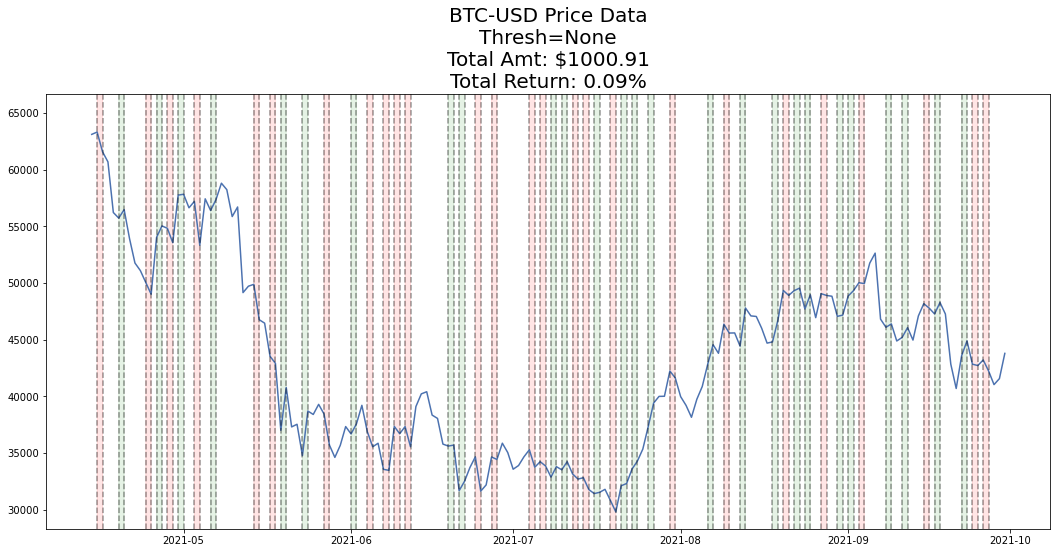

1000.9052930953236

In [109]:
run_simulation(returns, prices, 1000, 0.5, None, verbose=False)


<span style="color:grey; font-size:1.2em">Répétez la simulation d'achat aléatoire <b>1000 fois</b> pour vous assurer que nous serons toujours <b>sous la moyenne</b> de la somme d'argent <b>1000$</b> avec laquelle nous avons commencé.</span>

In [110]:
final_amts = [run_simulation(returns, prices, 1000, 0.5, None, verbose=False, plot=False) for _ in range(1000)]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5648.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5100.17it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5466.05it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3378.22it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3940.77it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3606.25it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3258.63it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3388.96it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 2455.83it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 1878.55it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3683.78it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3241.93it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3025.91it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3134.24it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3080.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 2921.57it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 2553.75it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 2972.71it/s]


Text(0.5, 1.0, 'Avg: $918.28\nSD: $259.48')

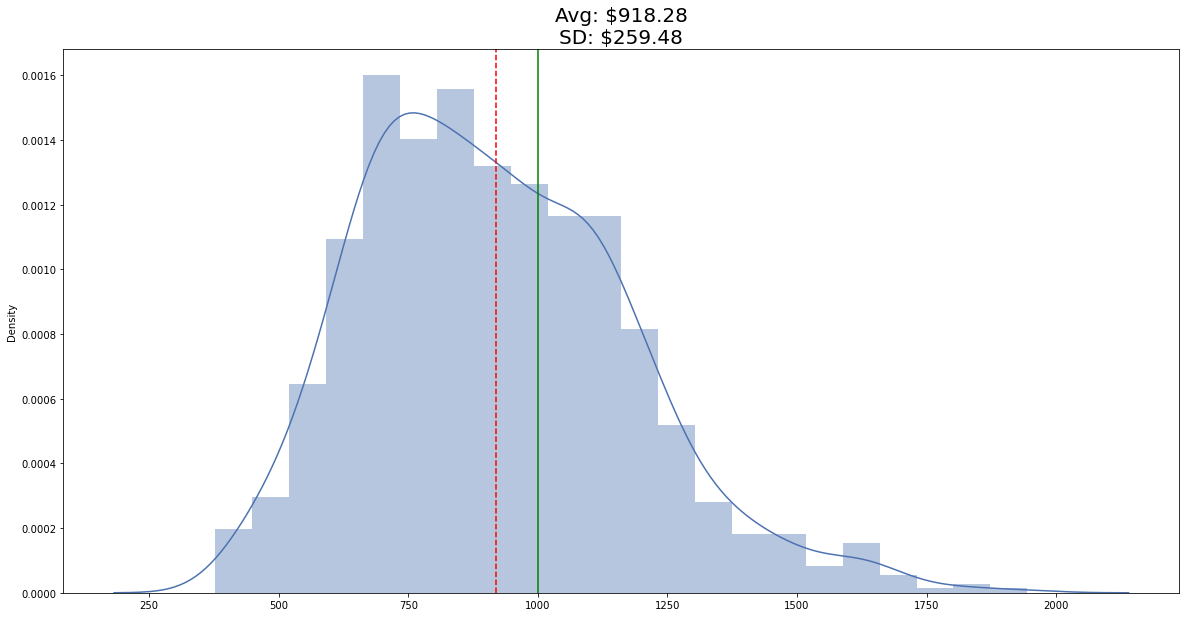

In [111]:
plt.figure(figsize=(20,10))
sb.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='r', linestyle='--')
plt.axvline(1000, color='g')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)


<h4 style="color:red; font-size:1.2em">Nous perdrons donc environ 5% de notre argent.</h4>

#### Technique: Si le dernier retour était positif, achetez

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3606.18it/s]


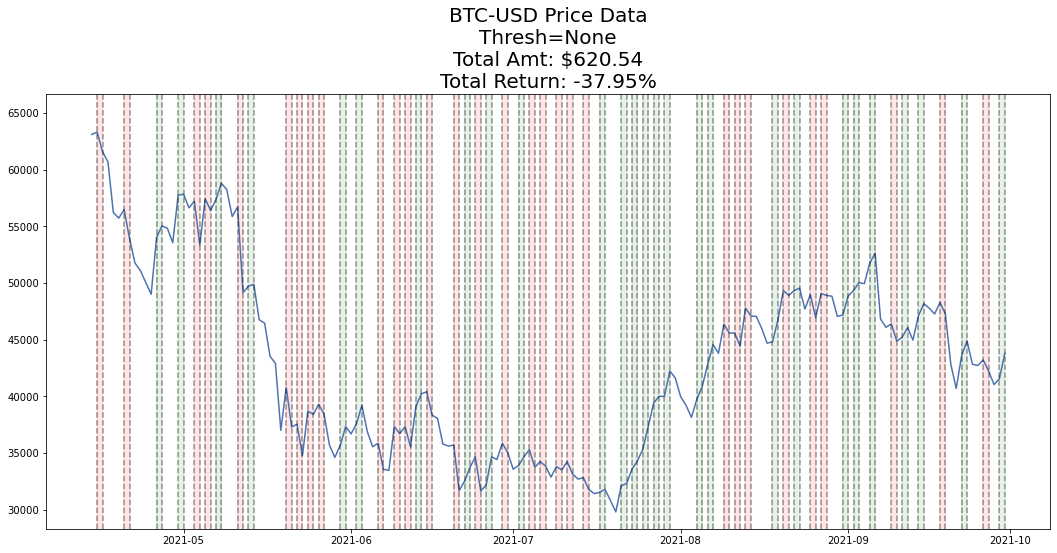

620.5443283485246

In [112]:
run_simulation(returns, prices, 1000, 'last', None, verbose=False)


<span style="color:grey; font-size:1.2em">La technique d'acheter le dernier retour si il est positif est ne fonctionne bien pas pour le bitcoin.</span>

#### Technique: AR(1) Model


<span style="color:grey; font-size:1.2em">chaque jour, nous prévoyons quelle sera la valeur du Bitcoin du jour suivant si ce résultat prédit est supérieur à un seuil que nous spécifions => le bot le fera mais sinon => aucun échange ne sera exécuté</span>

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:49<00:00,  3.44it/s]


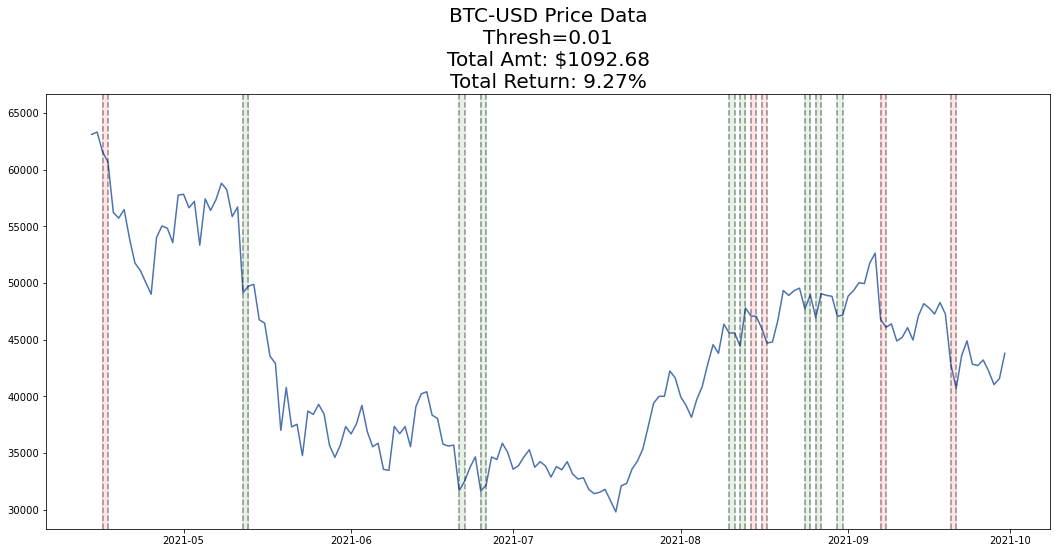

1092.6838673540194

In [113]:
run_simulation(returns, prices, 1000, (1,1,1), 0.01, verbose=False)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:11<00:00, 14.42it/s]


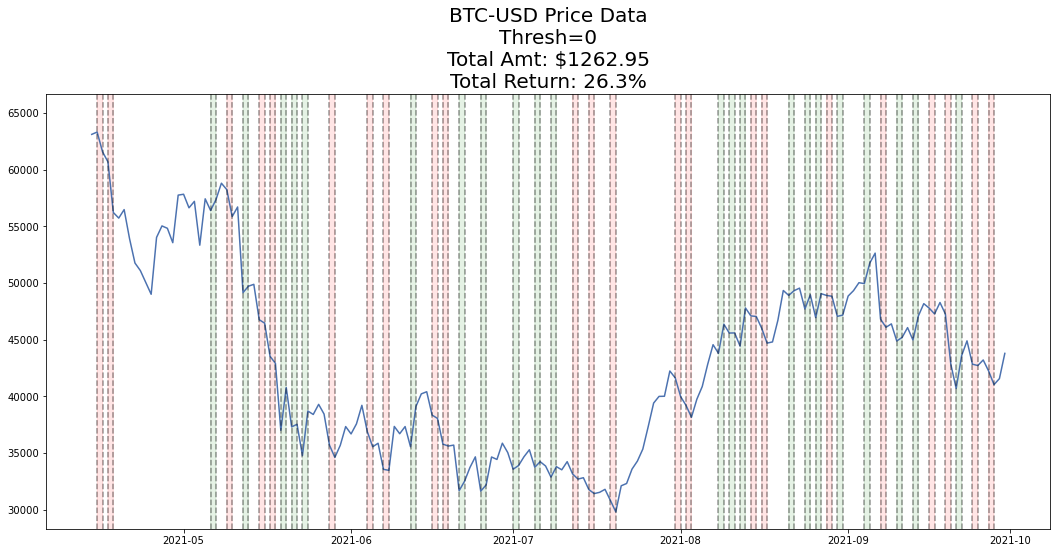

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:15<00:00, 10.79it/s]


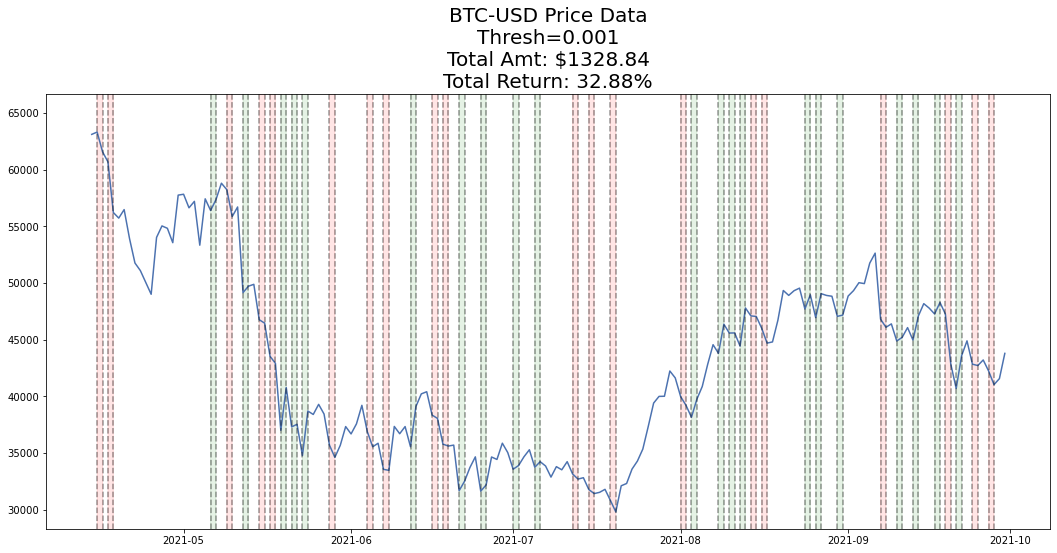

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:18<00:00,  9.01it/s]


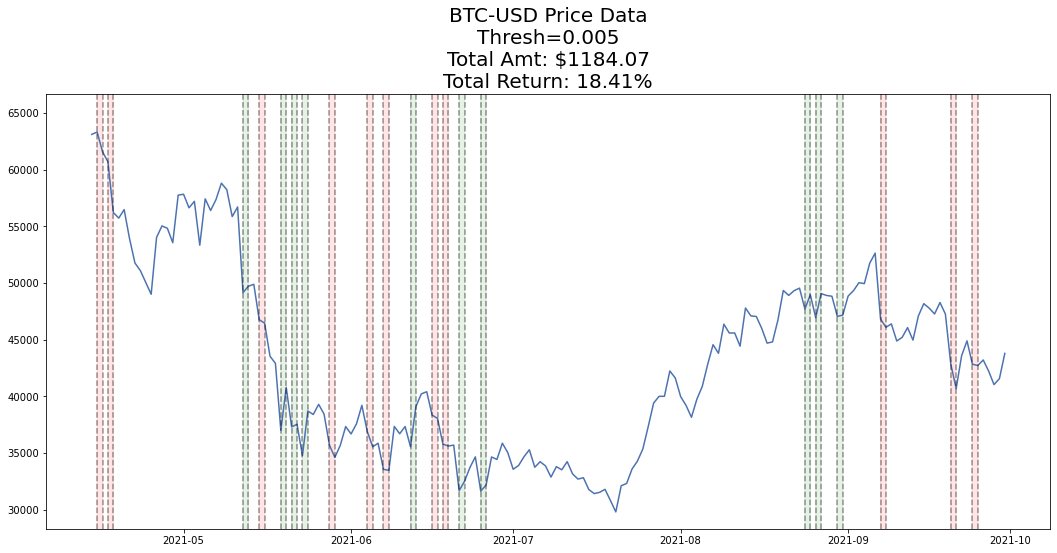

In [114]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 1000, (1,0,0), thresh, verbose=False)


<span style="color:grey; font-size:1.2em">Le <b>ARIMA(1,0,0)</b> avec un seuil de 0.001 atteint <b>44%</b> de retour ce qui est un <b>résultat exceptionnel</b> 🤑.</span>

### Technique: AR(5) Model


<span style="color:grey; font-size:1.2em">Essayons maintenant un <b>ARIMA(5,0,5)</b> </span>

  2%|█▉                                                                                                          | 3/169 [00:01<00:56,  2.96it/s]

Schur decomposition solver error.


  2%|██▌                                                                                                         | 4/169 [00:01<00:53,  3.10it/s]

Schur decomposition solver error.


  3%|███▏                                                                                                        | 5/169 [00:01<00:50,  3.27it/s]

Schur decomposition solver error.


  4%|███▊                                                                                                        | 6/169 [00:02<00:50,  3.24it/s]

Schur decomposition solver error.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [02:09<00:00,  1.30it/s]


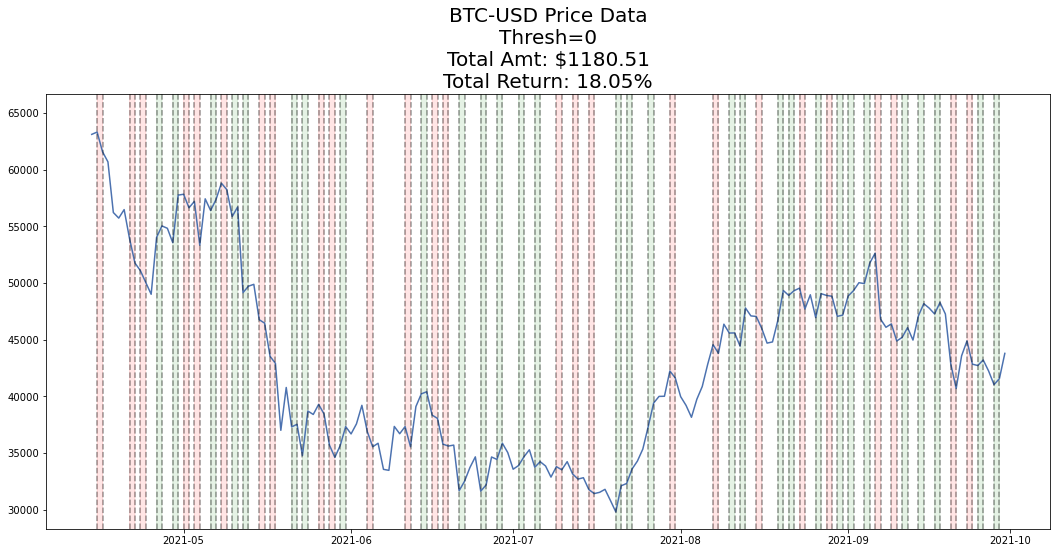

  2%|█▉                                                                                                          | 3/169 [00:01<00:58,  2.85it/s]

Schur decomposition solver error.


  2%|██▌                                                                                                         | 4/169 [00:01<00:55,  2.98it/s]

Schur decomposition solver error.


  3%|███▏                                                                                                        | 5/169 [00:01<00:54,  3.03it/s]

Schur decomposition solver error.


  4%|███▊                                                                                                        | 6/169 [00:02<00:53,  3.02it/s]

Schur decomposition solver error.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [02:06<00:00,  1.33it/s]


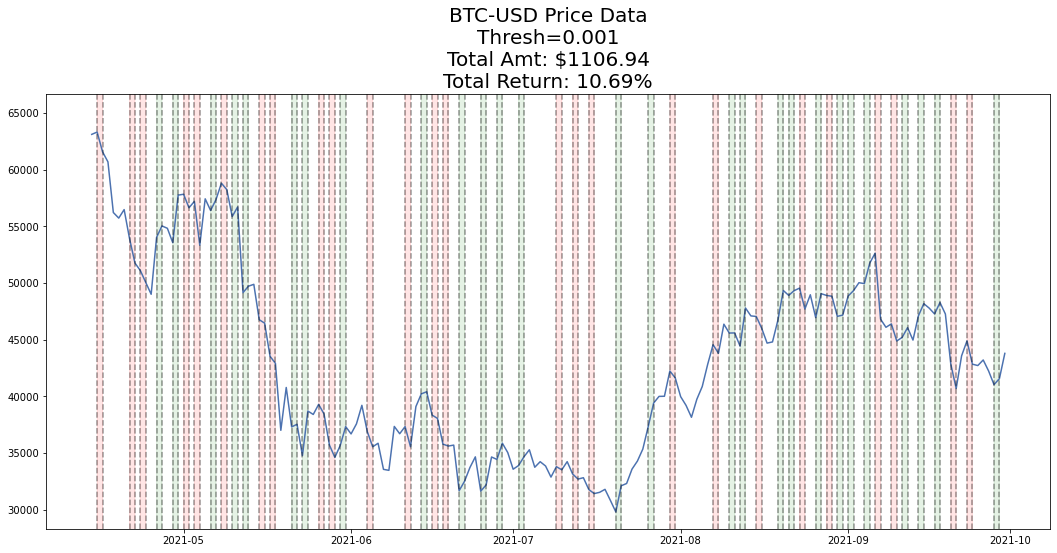

  2%|██▌                                                                                                         | 4/169 [00:01<00:36,  4.47it/s]

Schur decomposition solver error.


  3%|███▏                                                                                                        | 5/169 [00:01<00:36,  4.51it/s]

Schur decomposition solver error.


  4%|███▊                                                                                                        | 6/169 [00:01<00:36,  4.50it/s]

Schur decomposition solver error.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [01:55<00:00,  1.47it/s]


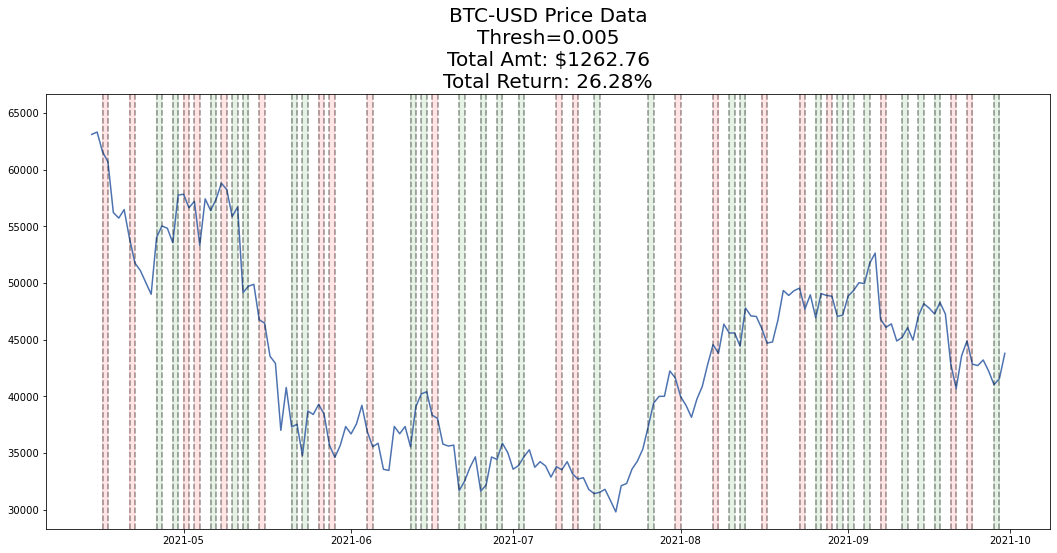

In [115]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 1000, (5,0,5), thresh, verbose=False)

<span style="color:grey; font-size:1.2em">Nous n'avons pas réussi à obtenir un meilleur résultat. Il est possible que nous ayons commencé d'entre dans la phase de "Overfitting"</span>

<div id="binance">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Trading in Binance
        </h3>
</div>



<span style="color:grey; font-size:1.2em"><b>Binance</b> est une plateforme qui permet de stocker, acheter, revendre, et échanger des <b>cryptomonnaies</b> contre d'autres cryptomonnaies mais également contre des monnaies fiduciaires telles que l'Euro2 ou le Dollar.</span>

In [116]:
!pip install python-binance
from binance.client import Client
from binance.exceptions import BinanceAPIException

<span style="color:grey; font-size:1.2em">La clé API est un identifiant unique qui authentifie les requêtes associées à votre projet à des fins d'utilisation et de facturation. Vous devez avoir au moins une clé API associée à votre projet</span>

In [117]:
# Entrez votre clé API ici
api_key="api_key"
api_secret="api_secret"

In [118]:
client = Client(api_key,api_secret)

In [119]:
pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','30 m ago UTC')).tail()

0               1               2               3   \
25  1643704740000  38507.27000000  38509.00000000  38487.98000000   
26  1643704800000  38492.78000000  38508.56000000  38470.00000000   
27  1643704860000  38504.53000000  38508.56000000  38486.31000000   
28  1643704920000  38486.32000000  38507.57000000  38486.31000000   
29  1643704980000  38492.07000000  38508.20000000  38492.06000000   

                4            5              6                 7    8   \
25  38492.77000000  10.12774000  1643704799999   389916.56159040  431   
26  38504.54000000  39.54016000  1643704859999  1521663.39334110  658   
27  38486.31000000   3.67482000  1643704919999   141490.84095180  324   
28  38492.06000000   9.15581000  1643704979999   352495.90336530  421   
29  38503.19000000   2.47019000  1643705039999    95106.35476290  145   

             9                10 11  
25   3.08455000  118761.16338090  0  
26  13.52034000  520314.41494640  0  
27   1.56018000   60069.66166090  0  
28   4.93874000  190118.53125440  0  
29   1.67965000   64669.40516140  0

In [120]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol,interval, lookback+' m ago UTC'))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame


In [121]:
visual_test=getminutedata('BTCUSDT','1m','30')

In [122]:

fig = px.line(visual_test.Open)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Price',
                   plot_bgcolor='white')

fig.show()

#### La Stratégie de notre Trading Bot


<span style="color:grey; font-size:1.2em">Chaque jour, nous prévoyons quelle sera la valeur du <b>Bitcoin</b> du jour suivant. <br>&emsp;&emsp;Si ce résultat prédit est supérieur à un seuil que nous spécifions => <b>Le bot va acheter 💰</b> <br> &emsp;&emsp;Sinon => <b>Aucun échange ne sera exécuté 😴</b></span>

In [123]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# buy if asset fell by more than 0.2% within the last 30 min
# sell if asset rises by more than 0.15% or falls further by 0.15%


def strategy(symbol, qty, entried=False):
    df = getminutedata(symbol, '1m', '30')
    cumulret = (df.Open.pct_change() + 1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol, side='BUY', type='MARKET', quantity=qty)
            print(order)
            enteried = True
        else:
            print ('No trade has been excuted')
    if entried:
        while True:
            df = getminutedata(symbol, '1m', '30')
            sincebuy = df.loc[df.index > pd.tp_datetime(order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() + 1).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] \
                    < -0.0015:
                    order = client.create_order(symbol=symbol,
                            side='SELL', type='MARKET', quantity=qty)
                    print(order)
                    break


In [124]:
#this try catch is used only because i dont have funds in my accounts so we can just try if its working 
#if i had funds it will trade directly in my account
try:
    strategy('BTCUSDT',0.001)
except BinanceAPIException:
    print("Account has insufficient balance for requested action.")
#just to know if there is another error other than the missing funds
except Exception as e:
    print(e)

No trade has been excuted


<center id="Conclusion">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h2>
</center>

<div style="color:grey; font-size:1.2em">Le travail que nous avons réalisé a consisté à exploirer le cycle de vie d'un project de Data Science en general et du Deep Learning et des séries chronologiques en particulier. On bien appris comment collecter les données, analyser et transformer les données, dans la partie du Pré-traitement on a diviser les données et adapater nous données, et dernièrement la construction des modèles en essayant différentes approches: Modèles de base, les Réseaux de neurones et les Prévision avec les séries chronologiques. Enfin, On a réalisé des simulations pour evaluer nos modèles ainsi qu'on a connceté un service de Trading Beninace pour effecturer les trades.
<br>
<br>
<span style="color:black; font-size:1.2em; background-color:#FFFFA6">Ce projet nous a permis d'acquérir nouvelles techniques, plusieurs bibliothèques et packages, ainsi qu'un vision plus claire sur le monde de trading et de crypto-monnaie.</span>
</div>